<a href="https://colab.research.google.com/github/suneelcs1615/DeepLearning/blob/main/Unit-02_Deep%20Neural%20Networks/Implementation_of_Forward_Propagation_in_a_Deep_Neural_Network_Using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Implementation of Forward Propagation in a Deep Neural Network Using TensorFlow

**Aim:** To implement forward propagation in a multi-layer neural network using TensorFlow and observe layer-wise outputs.

This notebook is an Open Educational Resource (OER) developed for teaching and learning purposes. It is released under the Creative Commons Attribution–ShareAlike (CC BY-SA 4.0) International License.

This license allows anyone to use, copy, adapt, modify, translate, remix, and redistribute the material in any medium or format, provided proper credit is given to the original author and any modified versions are shared under the same license.


---


*Citation Format:*
 *Suneel Kumar Duvvuri, Implementation of Forward Propagation in a Deep Neural Network Using TensorFlow. Open Educational Resource (OER). Licensed under CC BY-SA 4.0*

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0


#### 1. Define the Neural Network Architecture

We'll create a simple neural network with:
- An input layer
- Two hidden layers with ReLU activation
- An output layer with no activation (linear output)

In [8]:
# Define the model using Keras Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5, activation='relu', input_shape=(3,), name='hidden_layer_1'),
    tf.keras.layers.Dense(units=4, activation='relu', name='hidden_layer_2'),
    tf.keras.layers.Dense(units=2, name='output_layer')
])

# Display the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 5)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54 (216.00 B)

 Trainable params: 54 (216.00 B)

 Non-trainable params: 0 (0.00 B)

#### 2. Prepare Input Data

Let's create some sample input data for our network.

In [9]:
# Generate some sample input data
# Shape: (batch_size, input_features)
input_data = tf.constant([[1.0, 2.0, 3.0],
                          [4.0, 5.0, 6.0]], dtype=tf.float32)

print("Input Data Shape:", input_data.shape)
print("Input Data:\n", input_data.numpy())

Input Data Shape: (2, 3)
Input Data:
 [[1. 2. 3.]
 [4. 5. 6.]]


#### 3. Implement Forward Propagation and Observe Layer-wise Outputs

We can access the output of intermediate layers by creating a new model that outputs specific layers. This is useful for debugging and understanding the network's internal representations.

In [10]:
# Create a model that outputs the activation of each layer
layer_outputs = []
layer_names = []

for layer in model.layers:
    intermediate_model = tf.keras.Model(inputs=model.inputs, outputs=layer.output)
    output = intermediate_model(input_data)
    layer_outputs.append(output)
    layer_names.append(layer.name)

# Display layer-wise outputs
print("--- Forward Propagation Results ---")
for i, output in enumerate(layer_outputs):
    print(f"\nLayer: {layer_names[i]}")
    print(f"Output Shape: {output.shape}")
    print(f"Output Values:\n{output.numpy()}")

print("\n--- Final Model Output ---")
final_output = model(input_data)
print(f"Output Shape: {final_output.shape}")
print(f"Output Values:\n{final_output.numpy()}")

--- Forward Propagation Results ---

Layer: hidden_layer_1
Output Shape: (2, 5)
Output Values:
[[0.        0.        0.        2.6244833 0.1519025]
 [0.        0.        0.        4.127354  1.4462026]]

Layer: hidden_layer_2
Output Shape: (2, 4)
Output Values:
[[0.         0.         0.02926833 0.        ]
 [0.         0.         0.22219332 0.        ]]

Layer: output_layer
Output Shape: (2, 2)
Output Values:
[[-0.01208156 -0.02748556]
 [-0.09171829 -0.20865926]]

--- Final Model Output ---
Output Shape: (2, 2)
Output Values:
[[-0.01208156 -0.02748556]
 [-0.09171829 -0.20865926]]


The code above demonstrates how to define a multi-layer neural network in TensorFlow, feed input data through it, and observe the outputs at each layer during forward propagation.

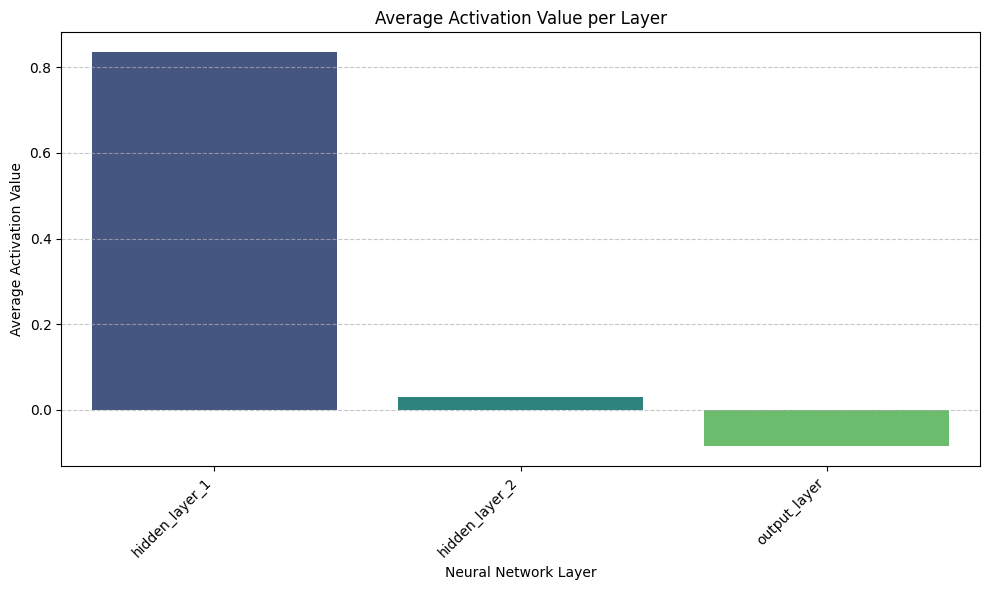

In [11]:
# Calculate the average activation value for each layer
average_activations = [tf.reduce_mean(output).numpy() for output in layer_outputs]

# Create a DataFrame for easy plotting
import pandas as pd
activation_df = pd.DataFrame({
    'Layer': layer_names,
    'Average Activation': average_activations
})

# Visualize the average activation values
plt.figure(figsize=(10, 6))
sns.barplot(x='Layer', y='Average Activation', hue='Layer', data=activation_df, palette='viridis', legend=False)
plt.title('Average Activation Value per Layer')
plt.xlabel('Neural Network Layer')
plt.ylabel('Average Activation Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This plot shows the average activation value for each layer in the neural network. This can give insight into how activations change as data passes through the network. For example, layers with ReLU activation might show lower average activations if many inputs result in zero.